<a href="https://colab.research.google.com/github/Varsh999/MLprojectssss/blob/main/Regularized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!
Shape: (205, 26)
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke

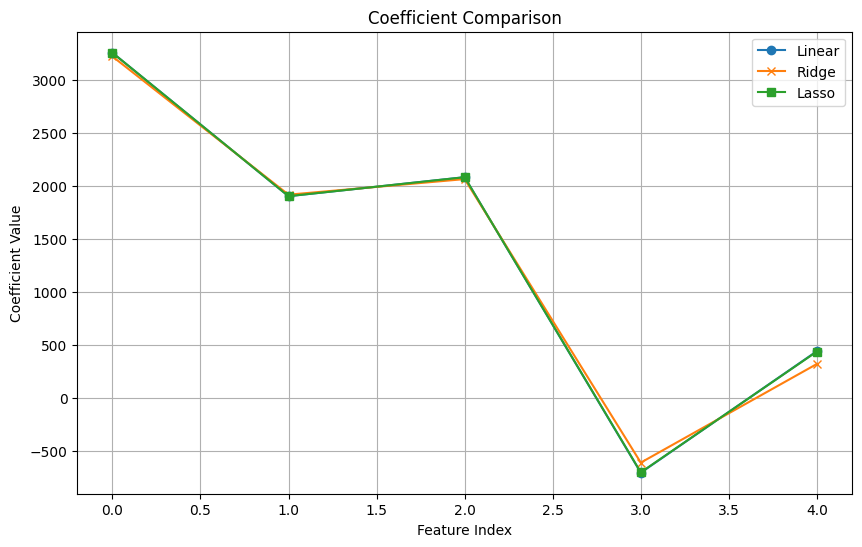

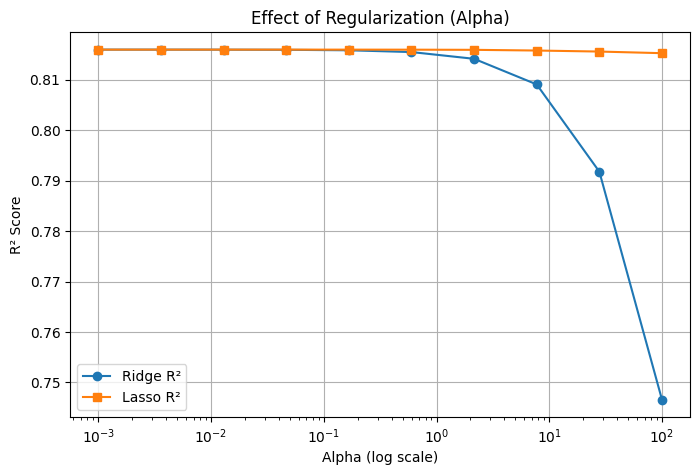

In [2]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


url = "https://gist.githubusercontent.com/abhi18av/cdf70d2b2d9a709fc2900698c06e7664/raw/CarPrice_Assignment.csv"
data = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print("Shape:", data.shape)
print(data.head())

features = ['enginesize', 'horsepower', 'curbweight', 'citympg', 'highwaympg']
X = data[features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)


lin_reg.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n MSE = {mse:.2f}, R² = {r2:.4f}\n")


print("\n📊 Model Performance:\n")
evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


coef_df = pd.DataFrame({
    "Feature": features,
    "Linear": lin_reg.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})
print("\n🔹 Coefficient Comparison:")
print(coef_df)

plt.figure(figsize=(10,6))
plt.plot(lin_reg.coef_, label='Linear', marker='o')
plt.plot(ridge.coef_, label='Ridge', marker='x')
plt.plot(lasso.coef_, label='Lasso', marker='s')
plt.title("Coefficient Comparison")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

alphas = np.logspace(-3, 2, 10)
ridge_scores, lasso_scores = [], []

for a in alphas:
    ridge = Ridge(alpha=a)
    lasso = Lasso(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    lasso.fit(X_train_scaled, y_train)
    ridge_scores.append(ridge.score(X_test_scaled, y_test))
    lasso_scores.append(lasso.score(X_test_scaled, y_test))

plt.figure(figsize=(8,5))
plt.semilogx(alphas, ridge_scores, label='Ridge R²', marker='o')
plt.semilogx(alphas, lasso_scores, label='Lasso R²', marker='s')
plt.title("Effect of Regularization (Alpha)")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()
